# КУРСОВАЯ РАБОТА

# Федулова Татьяна

## 1. Загрузить файл hr.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from scipy import stats

In [2]:
# загружаем датасет из файла  и смотрим первые строки

ratings = pd.read_csv('HR.csv')
ratings.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [3]:
# используем встроенную функцию pandas, выводим основные статистики для всех типов данных
ratings.describe(include='all').head(15)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


## 3. Рассчитать и визуализировать корреляционную матрицу для переменных


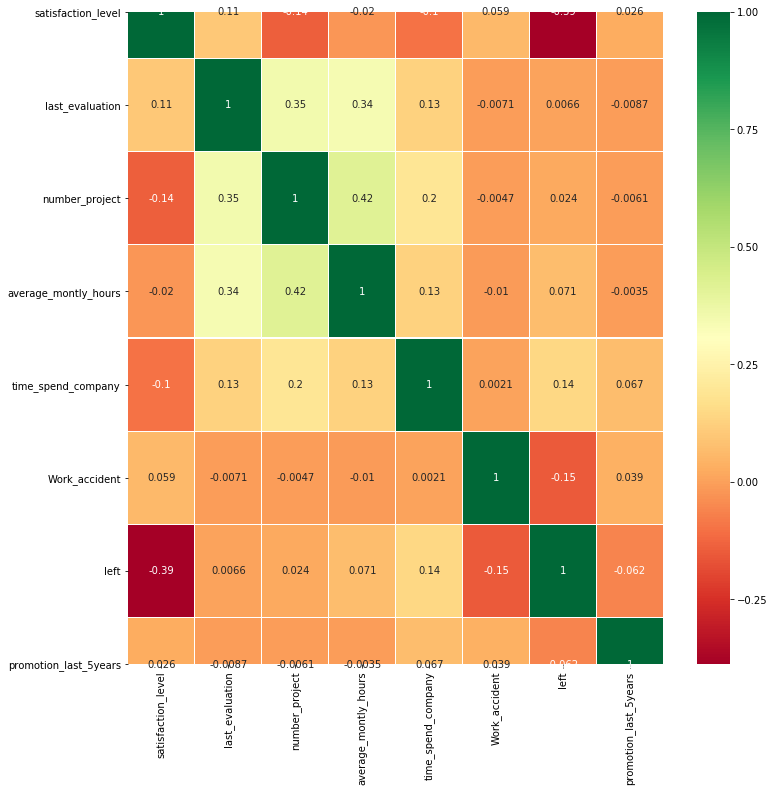

In [4]:
sns.heatmap(ratings.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

## 4. Визуализировать несколько взаимосвязей между переменными

По корреляционной матрице прослеживается зависимость между number_project и average_monthly_hours
нормируем их и визуализируем зависимость:

In [5]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

ratings_scaled = min_max_scaler.fit_transform(ratings[['number_project', 'average_montly_hours']])
ratings_norm = pd.DataFrame(ratings_scaled)
ratings_norm.head()

,0,1
0,0.0,0.285047
1,0.6,0.775701
2,1.0,0.822430
3,0.6,0.593458
4,0.0,0.294393


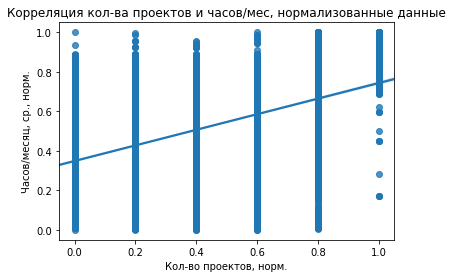

In [6]:
norm_number_project = ratings_norm[0]
norm_average_montly_hours = ratings_norm[1]
sns.regplot(x=norm_number_project, y=norm_average_montly_hours, data=ratings_norm, fit_reg=True)
plt.xlabel('Кол-во проектов, норм.')
plt.ylabel('Часов/месяц, ср., норм.')
plt.title('Корреляция кол-ва проектов и часов/мес, нормализованные данные')
plt.show()

Определим коэфф корреляции Пирсона
(в принципе, он есть в матрице корреляции, так что тут просто 2-й вариант определения, без построения матрицы):

In [7]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(norm_number_project, norm_average_montly_hours)
print(corr)

0.4172106344017771


Зависимость между number_project и average_monthly_hours БЕЗ нормировки, в естественных значениях:

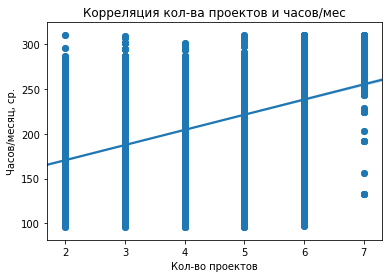

In [8]:
Projects = ratings['number_project']
Av_montly_hours = ratings['average_montly_hours']
plt.scatter(Projects, Av_montly_hours)
sns.regplot(x=Projects, y=Av_montly_hours, data=ratings, fit_reg=True)
plt.xlabel('Кол-во проектов')
plt.ylabel('Часов/месяц, ср.')
plt.title('Корреляция кол-ва проектов и часов/мес')
plt.show()

Также прослеживается обратная зависимость между left и satisfaction_level. Визуализируем зависимость, без предварительной нормировки:

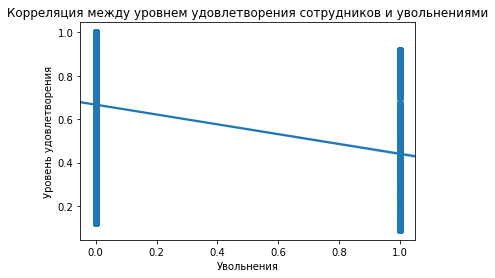

In [9]:
Satisfaction = ratings['satisfaction_level']
Left = ratings['left']
sns.regplot(x=Left, y=Satisfaction, data=ratings, fit_reg=True)
plt.xlabel('Увольнения')
plt.ylabel('Уровень удовлетворения')
plt.title('Корреляция между уровнем удовлетворения сотрудников и увольнениями')
plt.show()

## 5. С использованием t-test статистики проверить взаимосвязи между несколькими выборками (двумя или больше)

Возьмем совокупность данных о среднем кол-ве отработанных в месяц часов и посмотрим, как эти данные связаны с удовлетворенностью:

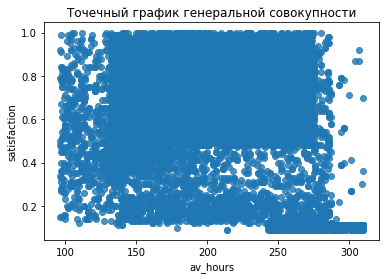

In [99]:
av_hours = ratings['average_montly_hours']
satisfaction = ratings['satisfaction_level']

sns.regplot(x=av_hours, y=satisfaction, data=ratings, fit_reg=False)
plt.xlabel('av_hours')
plt.ylabel('satisfaction')
plt.title('Точечный график генеральной совокупности')
plt.show()

В качестве выборки №1 возьмем сотрудников департамента SUPPORT.

В качестве выборки №2 возьмем сотрудников департамента MANAGEMENT.

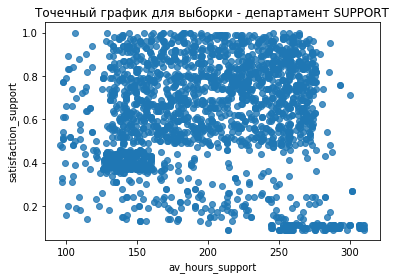

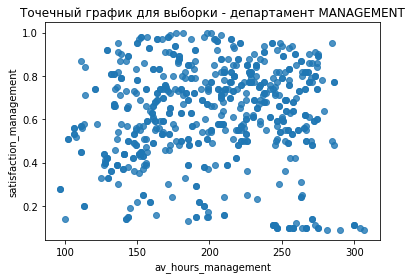

In [10]:
from scipy.stats import t

av_hours_support = ratings[ratings['sales']=='support']['average_montly_hours']
satisfaction_support = ratings[ratings['sales']=='support']['satisfaction_level']

sns.regplot(x=av_hours_support, y=satisfaction_support, data=ratings, fit_reg=False)
plt.xlabel('av_hours_support')
plt.ylabel('satisfaction_support')
plt.title('Точечный график для выборки - департамент SUPPORT')
plt.show()

av_hours_management = ratings[ratings['sales']=='management']['average_montly_hours']
satisfaction_management = ratings[ratings['sales']=='management']['satisfaction_level']

sns.regplot(x=av_hours_management, y=satisfaction_management, data=ratings, fit_reg=False)
plt.xlabel('av_hours_management')
plt.ylabel('satisfaction_management')
plt.title('Точечный график для выборки - департамент MANAGEMENT')
plt.show()

### Нулевая гипотеза - среднее значение выборки равно среднему значению генеральной совокупности
Сравним среднее значение удовлетворенности в генеральной совокупности, и затем в выборке, соответствующей отделу SUPPORT.
Сравниваем их с помощью t-критерия Стьюдента:

In [11]:
from scipy.stats import t

satisfaction_all = ratings['satisfaction_level']
print('Среднее значение satisfaction_level для генеральной совокупности: ', satisfaction_all.mean())
satisfaction_support = ratings[ratings['sales']=='support']['satisfaction_level']
print('Среднее значение satisfaction_level для выборки (отдел SUPPORT): ', satisfaction_support.mean())
print('N-1 соответствует:', len(ratings[ratings['sales']=='support'])-1)
stats.ttest_1samp(satisfaction_support, satisfaction_all.mean())

Среднее значение satisfaction_level для генеральной совокупности:  0.6128335222348166
Среднее значение satisfaction_level для выборки (отдел SUPPORT):  0.6182996859578297
N-1 соответствует: 2228


Ttest_1sampResult(statistic=1.047336893292001, pvalue=0.2950578291383667)

### получили t-value = 1,04, p-value = 0,3.  
### При этом N > 2000
### Оценим полученное значение по таблице:

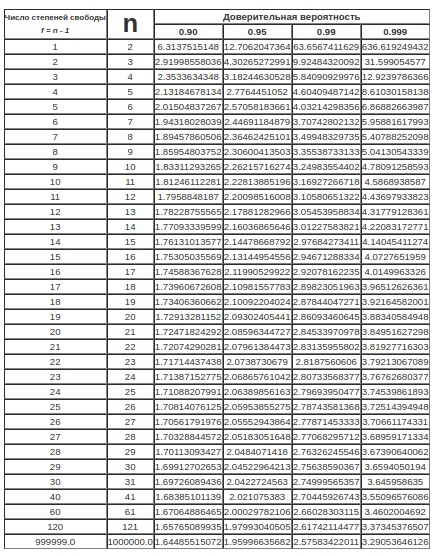

In [12]:
from IPython.display import Image
Image('https://sun9-13.userapi.com/c858132/v858132950/17426d/O9zG6rdfid4.jpg', width=600)

### Получаем, что раз наше t-value < 1,96 (для нашего N и для альфа = 0,05 это последняя строка таблицы), то нулевая гипотеза (соответствие между средним значением satisfaction_level для выборки и средним значением satisfaction_level для генеральной совокупности) верна.

Аналогично сравним среднее значение удовлетворенности в генеральной совокупности, и затем в выборке, соответствующей отделу MANAGEMENT:

In [13]:
satisfaction_all = ratings['satisfaction_level']
print('Среднее значение satisfaction_level для генеральной совокупности: ', satisfaction_all.mean())
satisfaction_manag = ratings[ratings['sales']=='management']['satisfaction_level']
print('Среднее значение satisfaction_level для выборки (отдел Management): ', satisfaction_manag.mean())
print('N-1 соответствует:', len(ratings[ratings['sales']=='management'])-1)
stats.ttest_1samp(satisfaction_manag, satisfaction_all.mean())

Среднее значение satisfaction_level для генеральной совокупности:  0.6128335222348166
Среднее значение satisfaction_level для выборки (отдел Management):  0.6213492063492058
N-1 соответствует: 629


Ttest_1sampResult(statistic=0.9385070291468304, pvalue=0.34834413741175474)

### получили t-value = 0,94, p-value = 0,35.  
### При этом N > 600
### Оценим полученное значение по таблице выше, получим опять же, что наша нулевая гипотеза верна.

## 6. Рассчитать сколько работников работает в каждом департаменте

In [14]:
sales=ratings['sales'].value_counts().to_frame()
sales.head(10)

,sales
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739
management,630


## 7. Показать распределение сотрудников по зарплатам

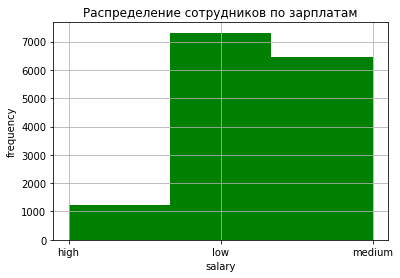

In [15]:
# plt.hist - строит частотный график выборки
n, bins, patches = plt.hist(ratings['salary'].sort_values(), 3, facecolor='g')

plt.xlabel('salary')
plt.ylabel('frequency')
plt.title('Распределение сотрудников по зарплатам')
plt.grid(True)
plt.show()

## 8. Показать распределение сотрудников по зарплатам совместно с департаментами

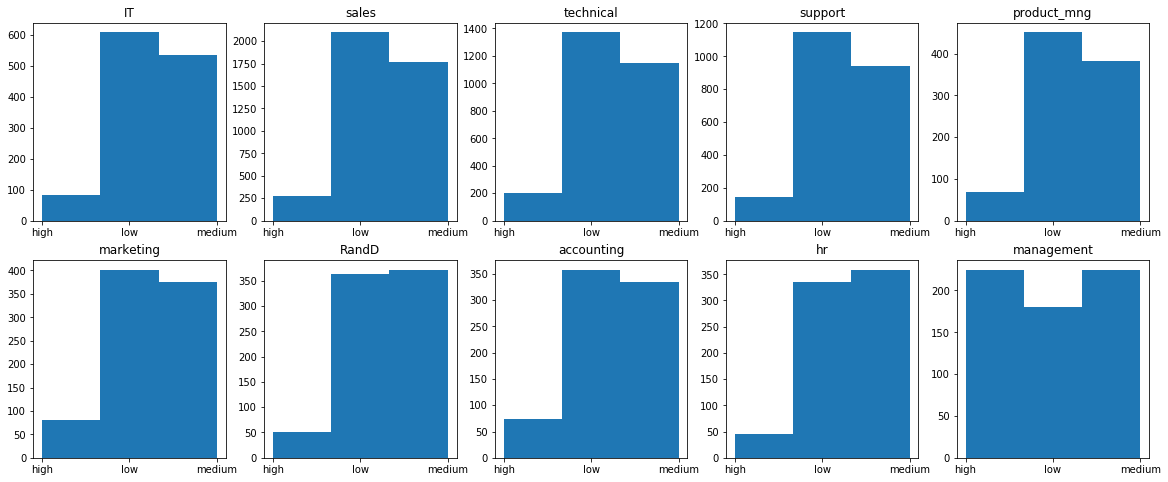

In [16]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
axs[0, 0].hist(ratings[(ratings['sales']=='IT')]['salary'].sort_values(),3)
axs[0, 0].set_title('IT')
axs[0, 1].hist(ratings[(ratings['sales']=='sales')]['salary'].sort_values(),3)
axs[0, 1].set_title('sales')
axs[0, 2].hist(ratings[(ratings['sales']=='technical')]['salary'].sort_values(),3)
axs[0, 2].set_title('technical')
axs[0, 3].hist(ratings[(ratings['sales']=='support')]['salary'].sort_values(),3)
axs[0, 3].set_title('support')
axs[0, 4].hist(ratings[(ratings['sales']=='product_mng')]['salary'].sort_values(),3)
axs[0, 4].set_title('product_mng')
axs[1, 0].hist(ratings[(ratings['sales']=='marketing')]['salary'].sort_values(),3)
axs[1, 0].set_title('marketing')
axs[1, 1].hist(ratings[(ratings['sales']=='RandD')]['salary'].sort_values(),3)
axs[1, 1].set_title('RandD')
axs[1, 2].hist(ratings[(ratings['sales']=='accounting')]['salary'].sort_values(),3)
axs[1, 2].set_title('accounting')
axs[1, 3].hist(ratings[(ratings['sales']=='hr')]['salary'].sort_values(),3)
axs[1, 3].set_title('hr')
axs[1, 4].hist(ratings[(ratings['sales']=='management')]['salary'].sort_values(),3)
axs[1, 4].set_title('management')
# plt.bar(['low', 'medium', 'high'], 1)
plt.show()

## 9. Сколько сотрудников покинули компанию

In [17]:
N = ratings[ratings['left']==1]['left'].value_counts()
print('Компанию покинуло ',int(N), 'сотрудников')

Компанию покинуло  3571 сотрудников


## 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

Посмотрим на гистограммы распределения параметров наших данных.
Затем отдельно на гистограммы для выборок уволившихся и работающих сотрудников.

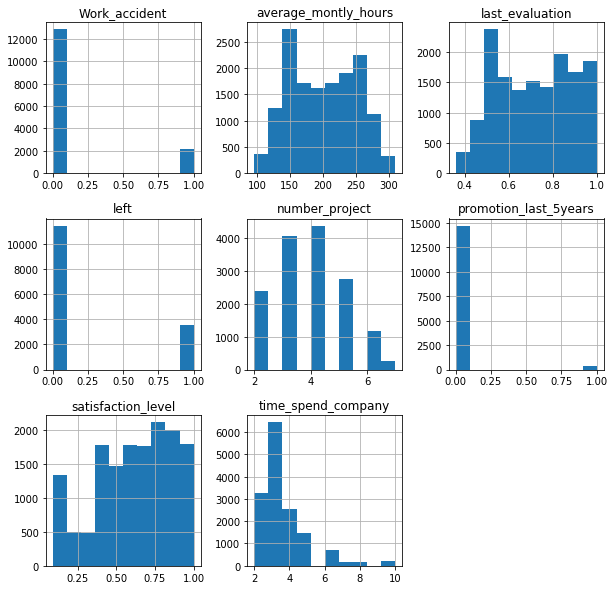

In [18]:
a = ratings[['number_project','left', 'satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'sales', 'salary']]
a.hist(figsize=(10,10))
plt.show()

Гистограммы для работающих


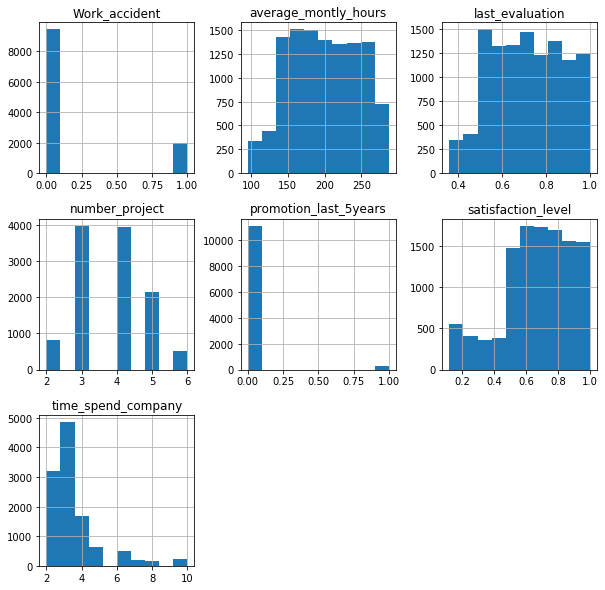

Гистограммы для уволившихся


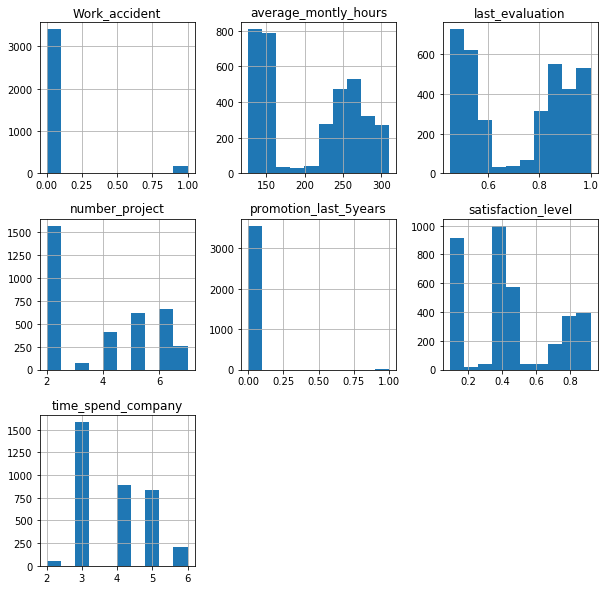

In [20]:
ratings_work = ratings[ratings['left']!=1]
ratings_left = ratings[ratings['left']==1]
b = ratings_work[['number_project', 'satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'sales', 'salary']]
b.hist(figsize=(10,10))
print('Гистограммы для работающих')
plt.show()
c = ratings_left[['number_project', 'satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'sales', 'salary']]
c.hist(figsize=(10,10))
print('Гистограммы для уволившихся')
plt.show()


На основании визуального анализа гистограмм заметно, что параметр "average_monthly_hours" распределен в выборке уволившихся иначе, чем у работающих сотрудников. Кроме того, обращает на себя внимание различие в "number_project" (но этот параметр связан с предыдущим, см. корреляцию между ними выше), а также различие в "satisfaction_level".
## ГИПОТЕЗА 1:
### менее занятые сотрудники (number_project <3), которые работают в компании 3 года, имеют более высокий риск уволиться.

In [21]:
import researchpy as rp

Протестируем выборку, соответствующую гипотезе, и сравним ее с остальными значениями в совокупности:

In [22]:
ratings_hypotesis = ratings[(ratings['number_project']<3)&(ratings['time_spend_company']==3)].left
ratings_others = ratings[(ratings['number_project']>=3)|(ratings['time_spend_company']!=3)].left

descriptives, results = rp.ttest(ratings_hypotesis, ratings_others)
print(descriptives)
print('_____________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0      left   1854.0  0.824164  0.380783  0.008843   0.806820  0.841508
1      left  13145.0  0.155420  0.362319  0.003160   0.149226  0.161615
2  combined  14999.0  0.238083  0.425924  0.003478   0.231266  0.244899
_____________________________
            Independent t-test     results
0  Difference (left - left) =       0.6687
1        Degrees of freedom =   14997.0000
2                         t =      73.9242
3     Two side test p value =       0.0000
4    Difference < 0 p value =       1.0000
5    Difference > 0 p value =       0.0000
6                 Cohen's d =       1.8339
7                 Hedge's g =       1.8338
8             Glass's delta =       1.7562
9                         r =       0.5168


### ВЫВОД: p-value = 0.00, поэтому можно сказать что различие между выборками значительное. Это не отвергает нашу гипотезу.

## ГИПОТЕЗА 2:
### сотрудники с низким уровнем зарплаты ('salary' = low), и уровнем занятости выше среднего ('average_montly_hours' > 201 ), имеют более высокий риск уволиться.

Протестируем выборку, соответствующую гипотезе:

In [23]:
ratings_hypotesis = ratings[(ratings['salary']=='low')&(ratings['average_montly_hours']>201)].left
ratings_others = ratings[(ratings['salary']!='low')|(ratings['average_montly_hours']<=201)].left

descriptives, results = rp.ttest(ratings_hypotesis, ratings_others)
print(descriptives)
print('_____________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0      left   3574.0  0.320369  0.466684  0.007806   0.305064  0.335675
1      left  11425.0  0.212341  0.408983  0.003826   0.204841  0.219842
2  combined  14999.0  0.238083  0.425924  0.003478   0.231266  0.244899
_____________________________
            Independent t-test     results
0  Difference (left - left) =       0.1080
1        Degrees of freedom =   14997.0000
2                         t =      13.3111
3     Two side test p value =       0.0000
4    Difference < 0 p value =       1.0000
5    Difference > 0 p value =       0.0000
6                 Cohen's d =       0.2551
7                 Hedge's g =       0.2551
8             Glass's delta =       0.2315
9                         r =       0.1081


### ВЫВОД: p-value = 0.00, поэтому можно сказать что различие между выборками значительное. Это не отвергает нашу гипотезу.